# Single-cell seq analysis

## 1. Download libs

In [ ]:
!pip install scanpy[leiden] scrublet celltypist decoupler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 41.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.wh

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import scrublet as scr
from scipy.stats import median_abs_deviation
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Download data from 10x genomics

In [ ]:
!wget https://cf.10xgenomics.com/samples/cell-exp/2.1.0/fixed_neurons_6days_2000/fixed_neurons_6days_2000_filtered_gene_bc_matrices.tar.gz -P /content/drive/MyDrive/itmo_bioinformatics_school_sc/

--2024-02-01 13:44:10--  https://cf.10xgenomics.com/samples/cell-exp/2.1.0/fixed_neurons_6days_2000/fixed_neurons_6days_2000_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17085367 (16M) [application/x-tar]
Saving to: ‘/content/drive/MyDrive/fixed_neurons_6days_2000_filtered_gene_bc_matrices.tar.gz.1’

fixed_neurons_6days 100%[===================>]  16.29M  42.7MB/s    in 0.4s    

2024-02-01 13:44:10 (42.7 MB/s) - ‘/content/drive/MyDrive/fixed_neurons_6days_2000_filtered_gene_bc_matrices.tar.gz.1’ saved [17085367/17085367]



In [ ]:
!tar -xzf /content/drive/MyDrive/fixed_neurons_6days_2000_filtered_gene_bc_matrices.tar.gz

## 3. Download data

In [ ]:
adata = sc.read_10x_mtx("/content/drive/MyDrive/filtered_gene_bc_matrices/mm10/")

In [ ]:
# duplicates check
adata.var_names_make_unique()

In [ ]:
adata # counts matrix

AnnData object with n_obs × n_vars = 1920 × 27998
    var: 'gene_ids'

In [ ]:
adata.X # row counts

<1920x27998 sparse matrix of type '<class 'numpy.float32'>'
	with 5541862 stored elements in Compressed Sparse Column format>

https://anndata.readthedocs.io/en/latest/

In [ ]:
adata.to_df()

,Xkr4,Gm1992,Gm37381,Rp1,Rp1-1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
AAACCTGAGTACGCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAACCTGCACAAGACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCATGGTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
AAACCTGGTATTCGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAACCTGTCCCAGGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGCTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTCATGCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TTTGTCAGTCTTCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTTTACTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# save row counts to additional layer
adata.layers["counts"] = adata.X.copy()

## 4. Quality control

In [ ]:
# annotation for mitohondrial genes
adata.var['mt'] = adata.var_names.str.startswith('mt-')

adata.var

,gene_ids,mt
Xkr4,ENSMUSG00000051951,False
Gm1992,ENSMUSG00000089699,False
Gm37381,ENSMUSG00000102343,False
Rp1,ENSMUSG00000025900,False
Rp1-1,ENSMUSG00000109048,False
...,...,...
AC168977.1,ENSMUSG00000079808,False
PISD,ENSMUSG00000095041,False
DHRSX,ENSMUSG00000063897,False
Vmn2r122,ENSMUSG00000096730,False


In [ ]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=[20], log1p=True, inplace=True)

In [ ]:
adata.obs
# now we have quality metrics in the colomns

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACCTGAGTACGCCC-1,2965,7.994970,8195.0,9.011401,12.336791,222.0,5.407172,2.708969
AAACCTGCACAAGACG-1,4415,8.392990,15941.0,9.676712,10.212659,337.0,5.823046,2.114046
AAACCTGCATGGTCAT-1,3400,8.131825,9812.0,9.191463,10.069303,186.0,5.231109,1.895638
AAACCTGGTATTCGTG-1,2473,7.813592,5973.0,8.695172,12.288632,159.0,5.075174,2.661979
AAACCTGTCCCAGGTG-1,2523,7.833600,6096.0,8.715552,12.253937,116.0,4.762174,1.902887
...,...,...,...,...,...,...,...,...
TTTGTCAGTAGCTCCG-1,1827,7.510978,3752.0,8.230310,12.420043,76.0,4.343805,2.025586
TTTGTCAGTCATGCAT-1,3303,8.102889,9495.0,9.158626,10.658241,192.0,5.262690,2.022117
TTTGTCAGTCTTCTCG-1,1696,7.436617,3311.0,8.105308,12.956811,63.0,4.158883,1.902748
TTTGTCAGTTTACTCT-1,3003,8.007700,8542.0,9.052868,12.479513,228.0,5.433722,2.669164


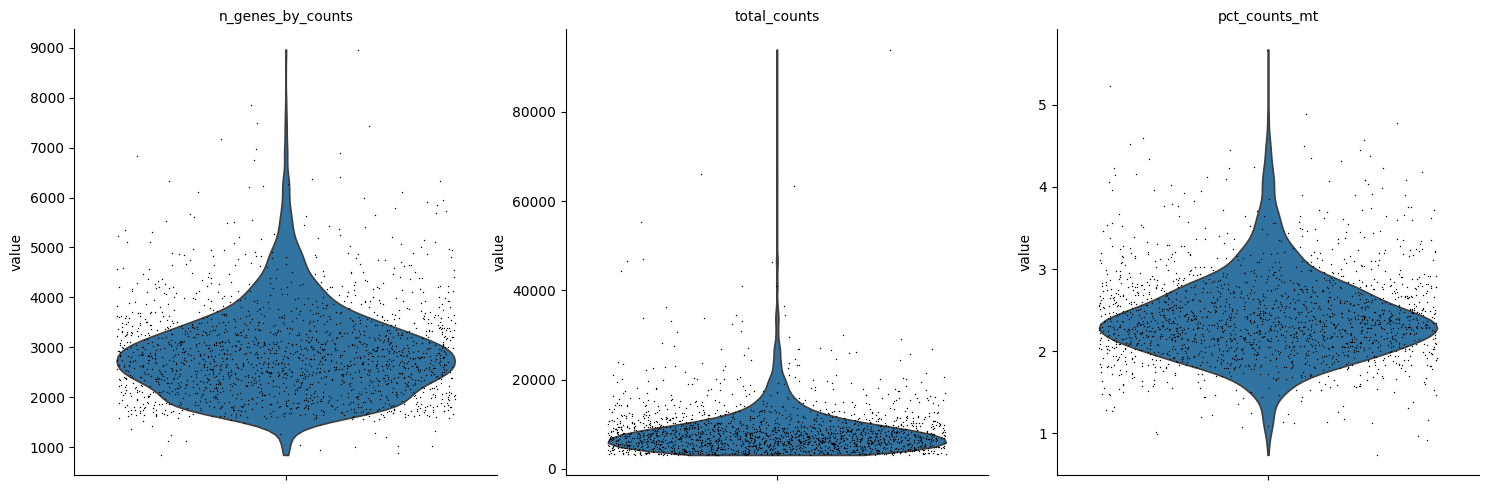

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

Now we need to filtrate our genes.

Let's choose thresholds.

In [ ]:
# cells which contains less than 200 detected genes
sc.pp.filter_cells(adata, min_genes=200)

In [ ]:
# genes that are expressed in less than 3 cells  х
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
# filtration for mitohondrial genes
adata = adata[adata.obs.pct_counts_mt < 3.5, :]

In [ ]:
# filtration for genes by counts
adata = adata[adata.obs.n_genes_by_counts < 4500, :]

In [ ]:
adata

View of AnnData object with n_obs × n_vars = 1741 × 15354
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'counts'

In [ ]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_genes
AAACCTGAGTACGCCC-1,2965,7.994970,8195.0,9.011401,12.336791,222.0,5.407172,2.708969,2965
AAACCTGCACAAGACG-1,4415,8.392990,15941.0,9.676712,10.212659,337.0,5.823046,2.114046,4415
AAACCTGCATGGTCAT-1,3400,8.131825,9812.0,9.191463,10.069303,186.0,5.231109,1.895638,3400
AAACCTGGTATTCGTG-1,2473,7.813592,5973.0,8.695172,12.288632,159.0,5.075174,2.661979,2473
AAACCTGTCCCAGGTG-1,2523,7.833600,6096.0,8.715552,12.253937,116.0,4.762174,1.902887,2523
...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGCTCCG-1,1827,7.510978,3752.0,8.230310,12.420043,76.0,4.343805,2.025586,1827
TTTGTCAGTCATGCAT-1,3303,8.102889,9495.0,9.158626,10.658241,192.0,5.262690,2.022117,3303
TTTGTCAGTCTTCTCG-1,1696,7.436617,3311.0,8.105308,12.956811,63.0,4.158883,1.902748,1696
TTTGTCAGTTTACTCT-1,3003,8.007700,8542.0,9.052868,12.479513,228.0,5.433722,2.669164,3003


In [ ]:
# filtration for doublets
scrub = scr.Scrublet(adata.X, expected_doublet_rate = 0.045)

In [ ]:
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets(min_counts=2, min_cells=3,
                                                          min_gene_variability_pctl=85, n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.38
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 9.1%
Overall doublet rate:
	Expected   = 4.5%
	Estimated  = 3.2%
Elapsed time: 2.0 seconds


<ipython-input-221-73b72ad4604a>:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets(min_counts=2, min_cells=3,


In [ ]:
adata.obs["predicted_doublets"].value_counts()

False    1736
True        5
Name: predicted_doublets, dtype: int64

(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

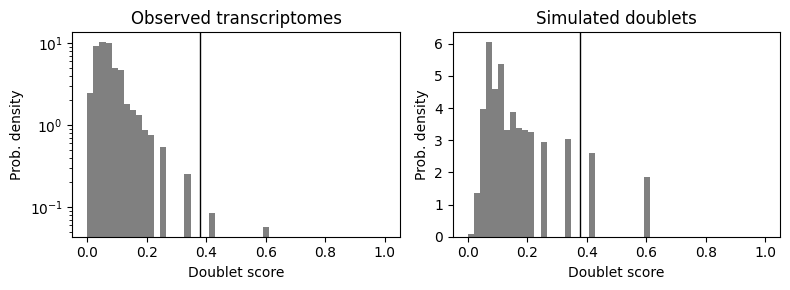

In [ ]:
scrub.plot_histogram()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


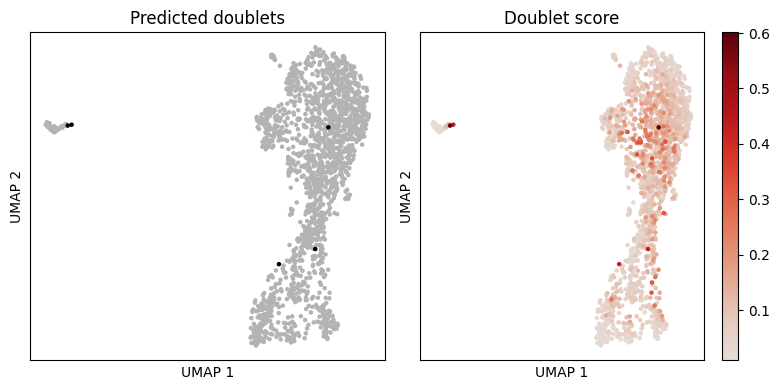

In [ ]:
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 30, min_dist=0.3))
scrub.plot_embedding('UMAP', order_points=True);

In [ ]:
adata = adata[~adata.obs["predicted_doublets"]]
adata

View of AnnData object with n_obs × n_vars = 1736 × 15354
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_scores', 'predicted_doublets'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'counts'

## 5. Selection for the most variable genes

In [ ]:
# nornalization
sc.pp.normalize_total(adata, target_sum=1e4) # деление на 10 в 4 или 10 в 6

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
# logarithm
sc.pp.log1p(adata)

In [ ]:
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=3000)

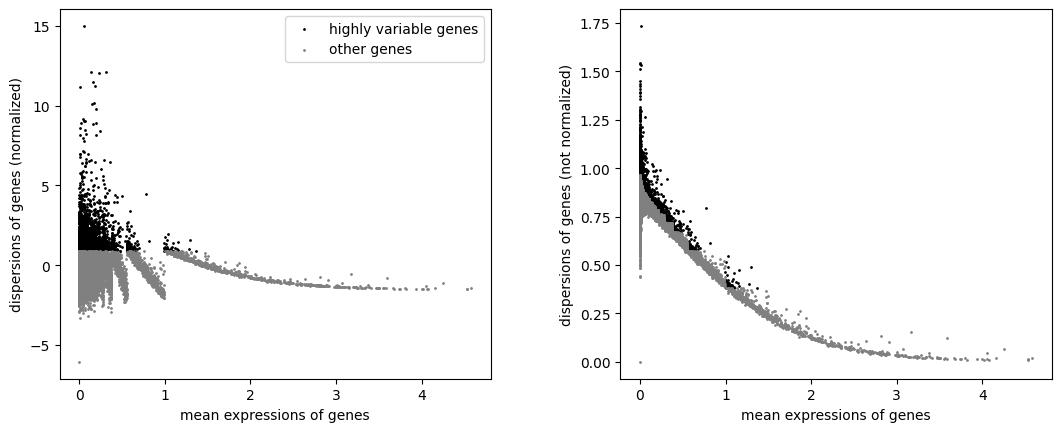

In [ ]:
sc.pl.highly_variable_genes(adata)

## 6. Clustering

In [ ]:
# pca
sc.pp.pca(adata, use_highly_variable=True)

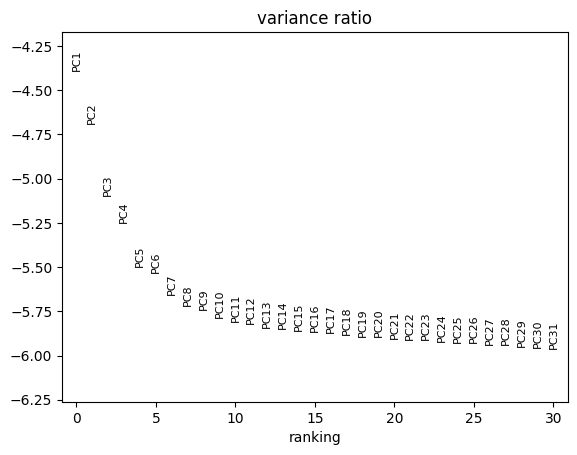

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True)

In [ ]:
# knn graph
sc.pp.neighbors(adata, n_pcs=15, n_neighbors=20, knn=True)

In [ ]:
sc.tl.leiden(adata, resolution=0.5, key_added="leiden_0.5")
sc.tl.leiden(adata, resolution=0.75, key_added="leiden_0.75")
sc.tl.leiden(adata, resolution=1, key_added="leiden_1")
sc.tl.leiden(adata, resolution=1.25, key_added="leiden_1.25")
sc.tl.leiden(adata, resolution=1.5, key_added="leiden_1.5")
sc.tl.leiden(adata, resolution=1.75, key_added="leiden_1.75")
sc.tl.leiden(adata, resolution=2, key_added="leiden_2")

In [ ]:
sc.tl.umap(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanp

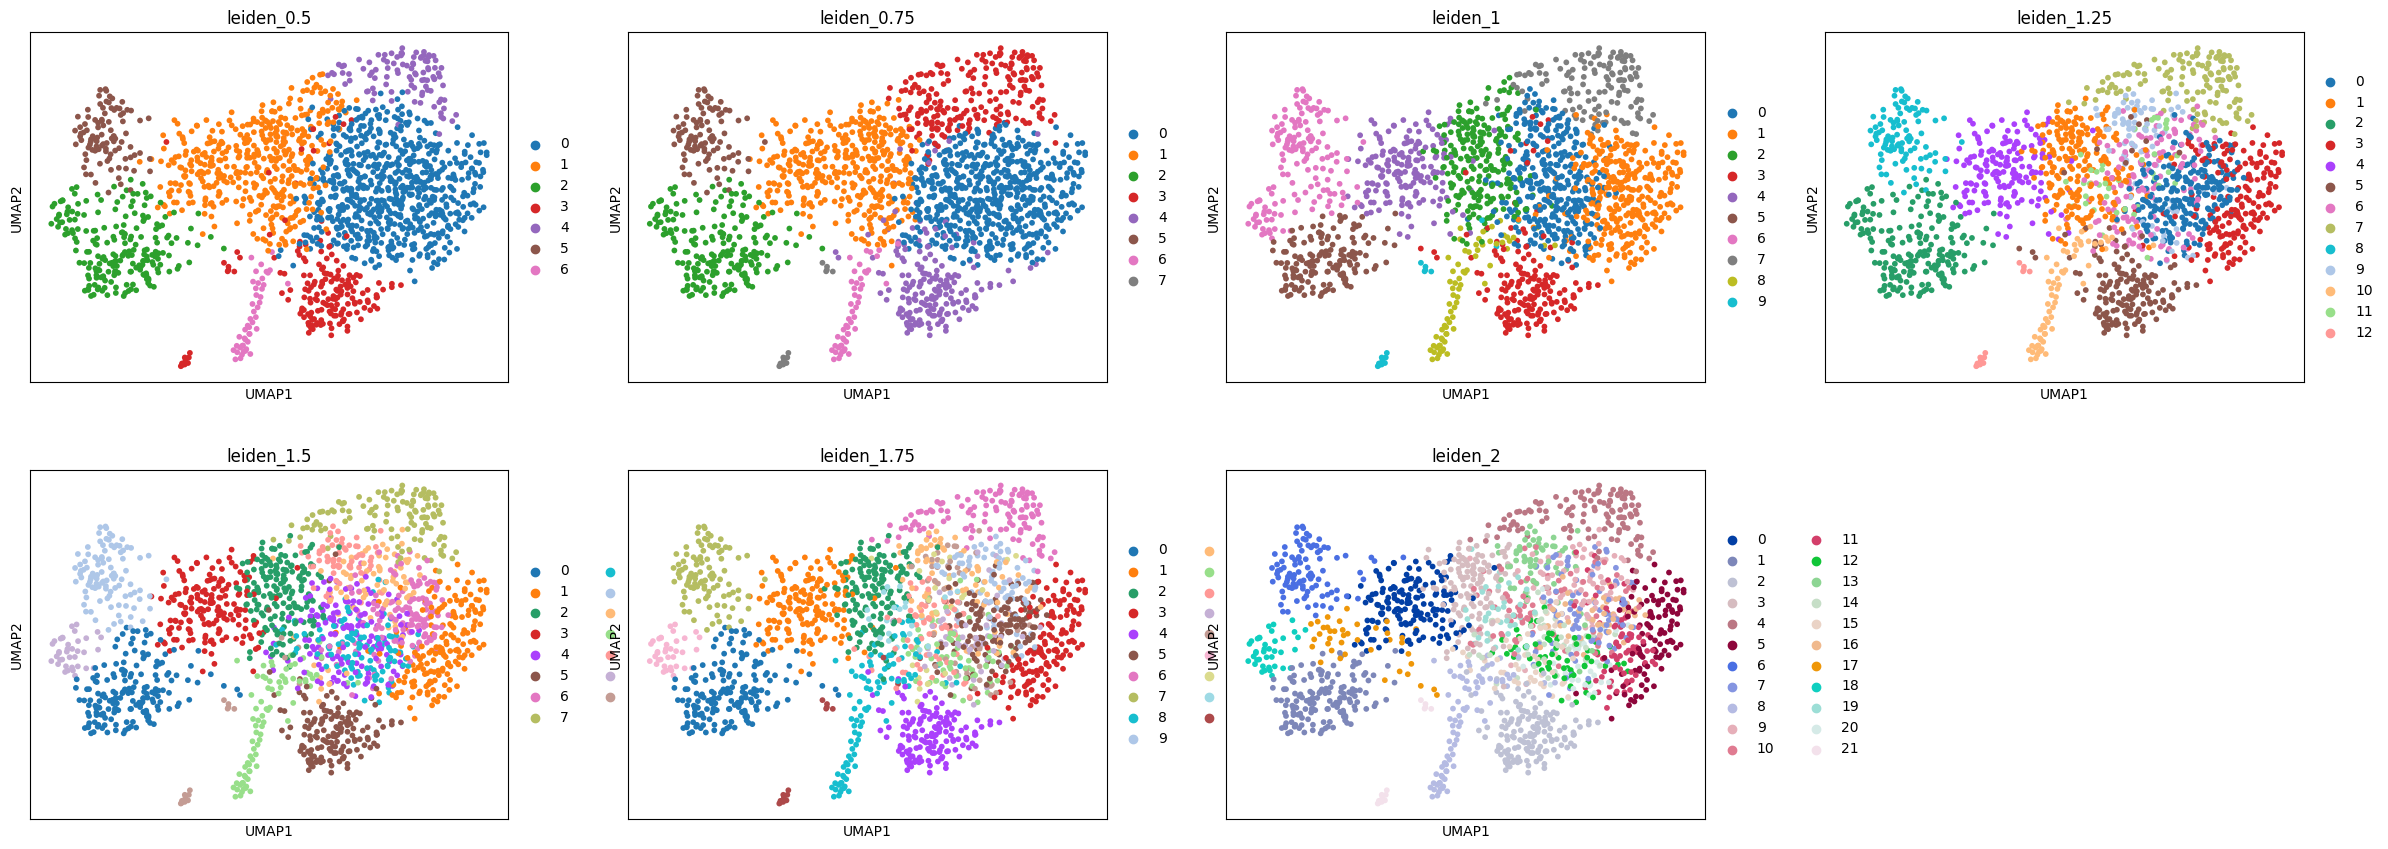

In [ ]:
sc.pl.umap(adata, color=["leiden_0.5", "leiden_0.75", "leiden_1", "leiden_1.25", "leiden_1.5", "leiden_1.75", "leiden_2"])

In [ ]:
# save results to .h5ad format
adata.write('/content/drive/MyDrive/adata_mouse.h5ad')